In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.xception import Xception
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_dir = '/content/drive/MyDrive/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Data/Test'

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 2s 0us/step


In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Data/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Data/Train/Thu cung',
 '/content/drive/MyDrive/Data/Train/Tai lieu',
 '/content/drive/MyDrive/Data/Train/Toa nha',
 '/content/drive/MyDrive/Data/Train/Selfie',
 '/content/drive/MyDrive/Data/Train/Nguoi',
 '/content/drive/MyDrive/Data/Train/Xe co',
 '/content/drive/MyDrive/Data/Train/Song suoi ho',
 '/content/drive/MyDrive/Data/Train/Giay',
 '/content/drive/MyDrive/Data/Train/Hoa don',
 '/content/drive/MyDrive/Data/Train/Hoa',
 '/content/drive/MyDrive/Data/Train/Dien thoai',
 '/content/drive/MyDrive/Data/Train/Chup man hinh',
 '/content/drive/MyDrive/Data/Train/Bien',
 '/content/drive/MyDrive/Data/Train/Bau troi',
 '/content/drive/MyDrive/Data/Train/Bia sach',
 '/content/drive/MyDrive/Data/Train/Dong ruong',
 '/content/drive/MyDrive/Data/Train/Cay coi',
 '/content/drive/MyDrive/Data/Train/Do an',
 '/content/drive/MyDrive/Data/Train/Duong pho',
 '/content/drive/MyDrive/Data/Train/Doi nui',
 '/content/drive/MyDrive/Data/Train/Ao quan']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=xception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11598 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


In [ ]:
%%time

import os
from keras.callbacks import ModelCheckpoint

checkpoint_path = "save-model/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              save_freq="epoch",
                                              verbose=1)

# thực hiện lưu thủ công tham số của model khi mới tạo
model.save_weights(checkpoint_path.format(epoch=0))

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[cp_callback]
)

Epoch 1/5
363/363 [==============================] - ETA: 0s - loss: 1.7335 - accuracy: 0.8714 
Epoch 00001: saving model to save-model/cp-0001.ckpt
363/363 [==============================] - 10127s 28s/step - loss: 1.7335 - accuracy: 0.8714 - val_loss: 1.8356 - val_accuracy: 0.8771
Epoch 2/5
363/363 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.9364
Epoch 00002: saving model to save-model/cp-0002.ckpt
363/363 [==============================] - 2335s 6s/step - loss: 0.9843 - accuracy: 0.9364 - val_loss: 4.2777 - val_accuracy: 0.8429
Epoch 3/5
363/363 [==============================] - ETA: 0s - loss: 0.9196 - accuracy: 0.9477
Epoch 00003: saving model to save-model/cp-0003.ckpt
363/363 [==============================] - 2348s 6s/step - loss: 0.9196 - accuracy: 0.9477 - val_loss: 4.5004 - val_accuracy: 0.8610
Epoch 4/5
363/363 [==============================] - ETA: 0s - loss: 0.8029 - accuracy: 0.9549
Epoch 00004: saving model to save-model/cp-0004.ckpt
363/36

In [ ]:
!cp -a "/content/save-model/." "/content/drive/MyDrive/model_xception/"

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk!")

!cp model.h5 "/content/drive/MyDrive/model_xception/"
!cp model.json "/content/drive/MyDrive/model_xception/"

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk!


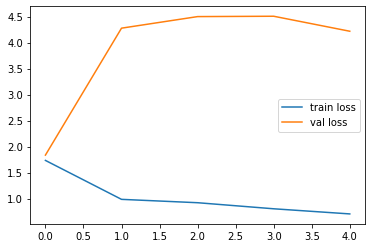

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


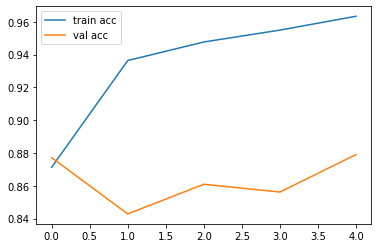

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
testfile = '/content/drive/MyDrive/test.jpg'

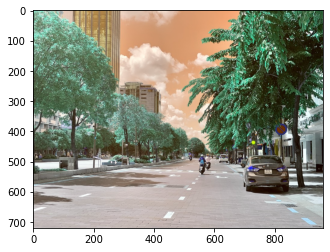

In [ ]:
import cv2
img = cv2.imread(testfile)
plt.imshow(img)

In [ ]:

img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
labe = model.predict(img)

In [ ]:
labe

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
folders[np.argmax(labe)]

'/content/drive/MyDrive/Data/Train/Giay'